In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as pl


In [2]:
class Cellular_Automaton:
    def __init__(self, nb_cells=1, dim=3, init='center'):
        self.nb_cells = nb_cells
        self.dim = dim
        
        if init == 'center':
            self.cells = [0] * self.nb_cells
            self.cells[self.nb_cells//2] = 1
        elif init == 'random':
            self.cells = [rd.randint(0, 1) for i in range(self.nb_cells)]
        else:
            self.cells = list(init)
            assert len(self.cells) == self.nb_cells, 'Wrong init'
    
    def id_to_rule(self, rule_id, dim):
        fmt = '{:0%sb}' % str(2**dim)
        rule = fmt.format(rule_id)
        rule = map(int, list(rule))
        return rule[::-1]
    
    def state_to_nb(self, state):
        nb = int(''.join(map(str, state)), base=2)
        return nb
    
    def rolling_window(self, li, wsize):
        s = wsize//2
        ext_li = li[-s:]+li+li[:s]
        res = []
        for i in range(len(li)):
            res.append(ext_li[i:i+wsize])
        return res

    def apply_rule(self, rule):
        assert len(rule) == 2**self.dim
        self.cells = [rule[self.state_to_nb(w)] for w in self.rolling_window(self.cells, self.dim)]
        return self
    
    def show_rule(self, rule_id):
        rule = self.id_to_rule(rule_id, self.dim)
        fmt = '{:0%sb}' % str(self.dim)
        res = []
        for i in range(2**self.dim):
            res.append([fmt.format(i), rule[i]])
        df_rule = pd.DataFrame(res,columns=['input', 'output'])
        return df_rule
    
    def iterate(self, rule_id, nb_iter=None):
        if nb_iter is None:
            nb_iter = self.nb_cells//2
        
        rule = self.id_to_rule(rule_id, self.dim)
        states = [self.cells] + [self.apply_rule(rule).cells for i in range(nb_iter)]
        states = np.array(states)[::]
        return states
    
    def plot(self, rule_id, nb_iter=None, ax=None):
        
        states = self.iterate(rule_id, nb_iter=nb_iter)
        states = states[::-1]
        nb_iter = states.shape[0]
        
        if ax is None:
            fig, ax = pl.subplots(figsize=(15,15))
        
        ax.pcolormesh(states, cmap="Greys")
        ax.set_xlim(0, self.nb_cells)
        ax.set_ylim(0, nb_iter+1)
        ax.set_title('Rule %i' % rule_id, fontsize=15)
        ax.set_axis_off()
        ax.set_aspect("equal")

        return ax
    

In [3]:
Cellular_Automaton(dim=3).show_rule(rule_id=126)

,input,output
0,000,0
1,001,1
2,010,1
3,011,1
4,100,1
5,101,1
6,110,1
7,111,0


In [4]:
arr = Cellular_Automaton(nb_cells=10, dim=3, init='center').iterate(rule_id=126, nb_iter=5)
arr

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]])

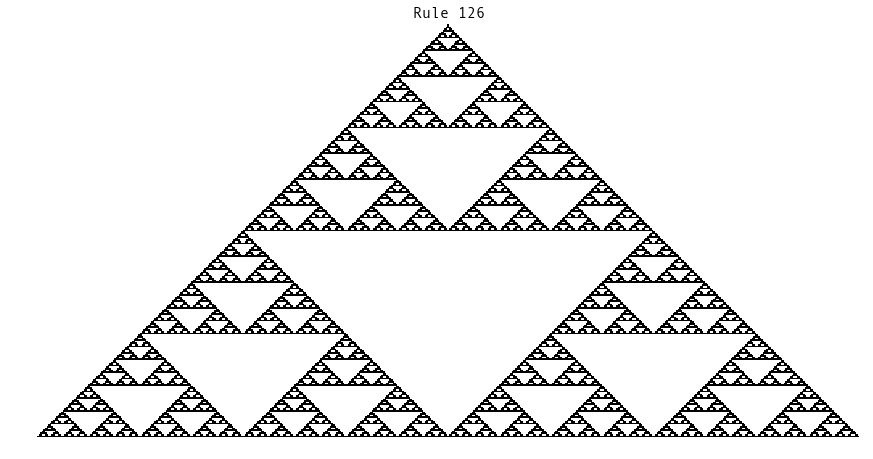

In [5]:
Cellular_Automaton(nb_cells=520, dim=3, init='center').plot(rule_id=126, nb_iter=255);

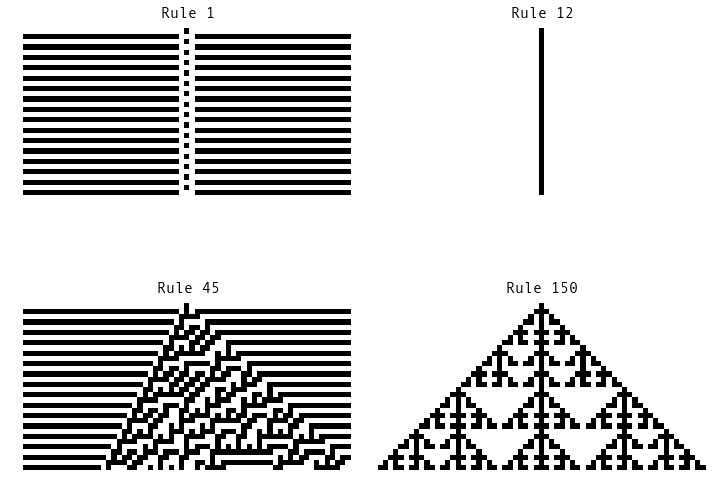

In [6]:
fig, ax = pl.subplots(ncols=2, nrows=2, figsize=(10, 8))

Cellular_Automaton(nb_cells=63, dim=3).plot(rule_id=1, ax=ax[0,0])
Cellular_Automaton(nb_cells=63, dim=3).plot(rule_id=12, ax=ax[0,1])
Cellular_Automaton(nb_cells=63, dim=3).plot(rule_id=45, ax=ax[1,0])
Cellular_Automaton(nb_cells=63, dim=3).plot(rule_id=150, ax=ax[1,1])

fig.tight_layout()

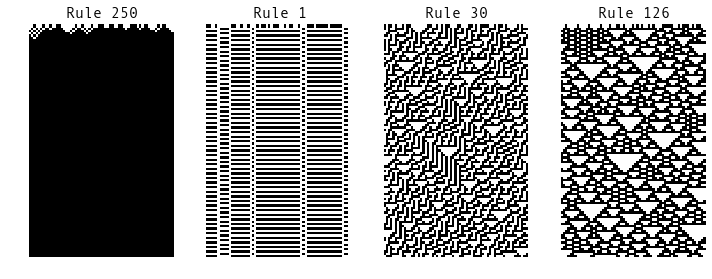

In [7]:
fig, ax = pl.subplots(ncols=4, figsize=(10, 10))

Cellular_Automaton(nb_cells=63, dim=3, init='random').plot(rule_id=250, nb_iter=100, ax=ax[0])
Cellular_Automaton(nb_cells=63, dim=3, init='random').plot(rule_id=1, nb_iter=100, ax=ax[1])
Cellular_Automaton(nb_cells=63, dim=3, init='random').plot(rule_id=30, nb_iter=100, ax=ax[2])
Cellular_Automaton(nb_cells=63, dim=3, init='random').plot(rule_id=126, nb_iter=100, ax=ax[3])

fig.tight_layout()

In [8]:
print 'Number of different rules: Explosive !'
for dim in range(1, 10, 2):
    nb_rule = 2**(2**dim)
    print 'dim={}\t{}'.format(dim, float(nb_rule))

Number of different rules: Explosive !
dim=1	4.0
dim=3	256.0
dim=5	4294967296.0
dim=7	3.40282366921e+38
dim=9	1.34078079299e+154
